In [8]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [9]:
# Load dataset
df = pd.read_csv('Final_data.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/2019,488,14.0,36.1,17.30,0.504098,486.45,Alabama
1,12/31/2019,824,10.9,36.1,23.00,0.509709,810.11,Arizona
2,12/31/2019,193,13.6,37.4,15.60,0.559585,192.48,Arkansas
3,12/31/2019,5566,10.1,26.2,12.25,0.512576,5558.86,California
4,12/31/2019,545,7.0,23.8,17.20,0.473394,538.54,Colorado


In [11]:
df = df.loc[df['State']==['United States']]

ValueError: ('Lengths must match to compare', (1200,), (1,))

In [307]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,40858


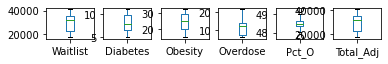

In [308]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

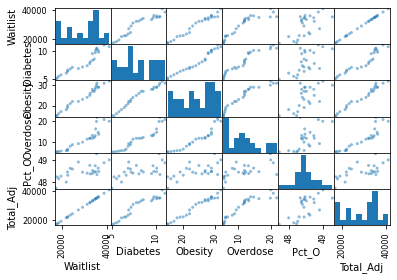

In [309]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [310]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,29413.360000,8.043600,24.160000,11.640000,48.495486,29157.520000
std,7234.193303,1.910264,5.390424,5.054453,0.324345,7218.461298
min,17257.000000,4.980000,15.000000,5.500000,47.725561,17065.000000
25%,22497.000000,6.620000,20.000000,6.800000,48.340966,22265.000000
50%,32371.000000,7.800000,25.000000,11.900000,48.453839,32060.000000
75%,35033.000000,9.810000,29.000000,13.800000,48.628091,34791.000000
max,41105.000000,11.090000,32.000000,21.700000,49.281419,40858.000000


In [311]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.980433  0.951138  0.640197
Obesity   0.980433  1.000000  0.938590  0.653905
Overdose  0.951138  0.938590  1.000000  0.633031
Pct_O     0.640197  0.653905  0.633031  1.000000


In [312]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [313]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [314]:
#Create model
model = LinearRegression()

In [315]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9821145469069239
Testing Score: 0.9536959965556824


Text(0.5, 1.0, 'Residual Plot')

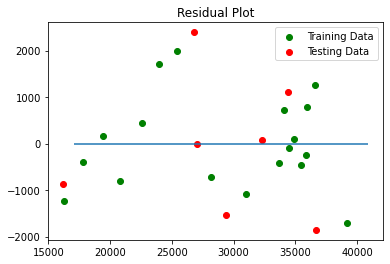

In [316]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [317]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.9754923265492258


In [318]:
print(model.intercept_)

[-33926.93880241]


In [319]:
print(model.coef_)

[[-893.60651758 1851.62912613 -286.19686559  594.71258729]]


In [320]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[39146.65019117]]


In [321]:
print(X_train.shape)

(18, 4)


In [322]:
print(y_train.shape)

(18, 1)


In [323]:
print(y_test.shape)

(7, 1)


In [324]:
print(X_test.shape)

(7, 4)


In [325]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [326]:
print(X.shape)

(25, 4)


In [327]:
print(y.shape)

(25, 1)


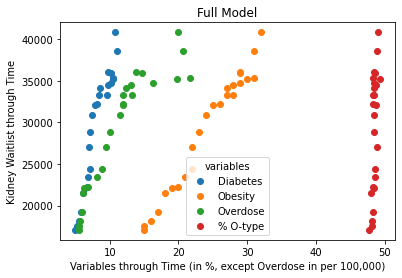

In [328]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
plt.savefig('images/US_full.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

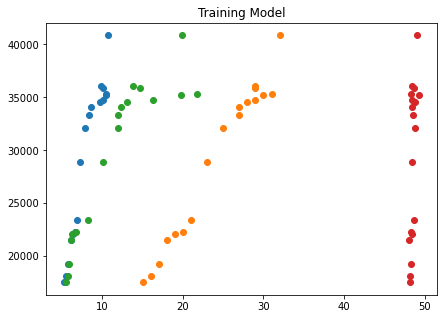

In [329]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

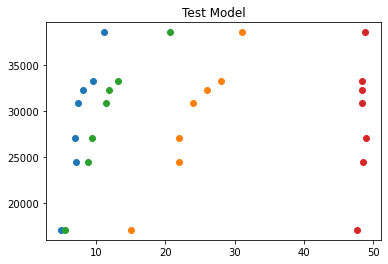

In [330]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

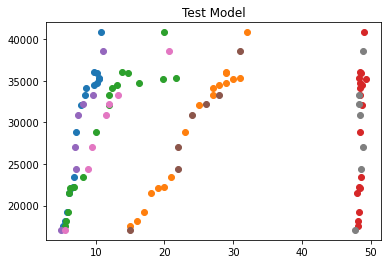

In [331]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [332]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           4.15e-16
Time:                        21:31:14   Log-Likelihood:                -209.83
No. Observations:                  25   AIC:                             429.7
Df Residuals:                      20   BIC:                             435.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.484e+04   4.76e+04     -0.312      0.758   -1.14e+05    8.44e+04
Diabetes   -1050.0453    729.124     -1.440      0.165   -2570.972     470.882
Obesity     1773.7047    234.207      7.573      0.000    1285.157    2262.252
Overdose    -110.6551    157.644     -0.702      0.491    -439.495     218.185
Pct_O        224.3979    997.606      0.225      0.824   -1856.572    2305.368
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.147
Skew:                          -0.668   Prob(JB):                        0.342
Kurtosis:                       2.473   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [333]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
0,12/31/1995,17257,4.98,15,5.5,47.725561,17065
1,12/31/1996,17732,5.23,15,5.5,48.234830,17519
2,12/31/1997,18405,5.52,16,5.7,48.149959,18173
3,12/31/1998,19473,5.80,17,5.9,48.266831,19226
4,12/31/1999,21835,6.09,18,6.1,48.000916,21566
5,12/31/2000,22378,6.41,19,6.2,48.453839,22123
6,12/31/2001,22497,6.62,20,6.8,48.308663,22265
7,12/31/2002,23644,6.85,21,8.2,48.621215,23422
8,12/31/2003,24617,7.12,22,8.9,48.588374,24400
9,12/31/2004,27274,6.92,22,9.4,48.903718,27034


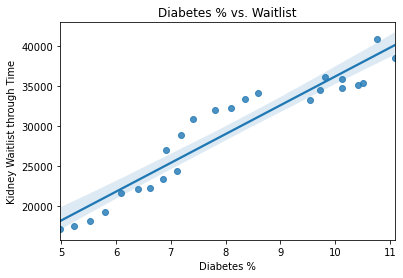

In [334]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/US_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

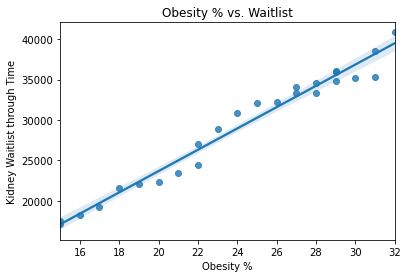

In [335]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/US_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

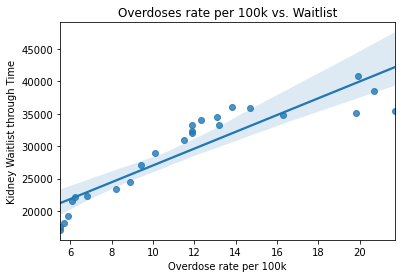

In [336]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/US_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

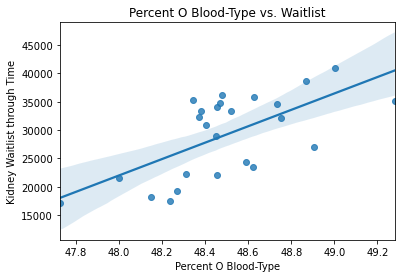

In [337]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/US_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

<AxesSubplot:xlabel='Pct_O'>

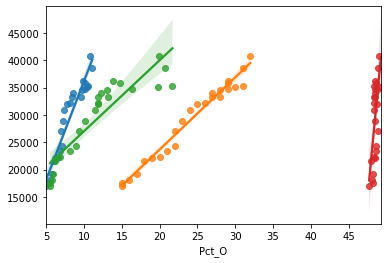

In [338]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

In [339]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

,0,1,2,3
0,-893.607,1851.63,-286.197,594.713


In [340]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

,0,1,2,3,4
0,0.975492,0.982115,0.953696,[-33926.93880240734],[[39146.65019117306]]


In [341]:
#dfi.export(test_df, 'test_df.png')

In [342]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

In [343]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975492,0.982115,0.953696,[-33926.93880240734],[[39146.65019117306]],40858,-893.607,1851.63,-286.197,594.713


In [344]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                   int64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [345]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975492,0.982115,0.953696,[-33926.93880240734],[[39146.65019117306]],40858,-893.607,1851.63,-286.197,594.713


In [346]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]

In [347]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.9755,0.9821,0.9537,-33926,-893.607,1851.63,-286.197,594.713,40858,39146


In [350]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.975500,0.982100,0.953700,-33926,-893.606518,1851.629126,-286.196866,594.712587,40858,39146
